In [1]:
##import the required libraries and APIs
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.6.0


In [2]:
data = "October arrived, spreading a damp chill over the grounds and into the castle.\n Madam Pomfrey, the nurse, was kept busy by a sudden spate of colds among the staff and students.\n Her Pepperup potion worked instantly, though it left the drinker smoking at the ears for several hours afterward. Ginny Weasley, who had been looking pale, was bullied into taking some by Percy.\n The steam pouring from under her vivid hair gave the impression that her whole head was on fire.\n Raindrops the size of bullets thundered on the castle windows for days on end; the lake rose, the flower beds turned into muddy streams, and Hagrid's pumpkins swelled to the size of garden sheds.\n Oliver Wood's enthusiasm for regular training sessions, however, was not dampened, which was why Harry was to be found, late one stormy Saturday afternoon a few days before Halloween, returning to Gryffindor Tower, drenched to the skin and splattered with mud."


In [3]:
##instantiate tokenizer
tokenizer = Tokenizer()

##create corpus by lowering the letters and splitting the text by \n
corpus = data.lower().split("\n")
print(corpus)

['october arrived, spreading a damp chill over the grounds and into the castle.', ' madam pomfrey, the nurse, was kept busy by a sudden spate of colds among the staff and students.', ' her pepperup potion worked instantly, though it left the drinker smoking at the ears for several hours afterward. ginny weasley, who had been looking pale, was bullied into taking some by percy.', ' the steam pouring from under her vivid hair gave the impression that her whole head was on fire.', " raindrops the size of bullets thundered on the castle windows for days on end; the lake rose, the flower beds turned into muddy streams, and hagrid's pumpkins swelled to the size of garden sheds.", " oliver wood's enthusiasm for regular training sessions, however, was not dampened, which was why harry was to be found, late one stormy saturday afternoon a few days before halloween, returning to gryffindor tower, drenched to the skin and splattered with mud."]


In [4]:
tokenizer.fit_on_texts(corpus)

##calculate vocabulary size - +1 for <oov> token
vocab_size = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(vocab_size)

{'the': 1, 'was': 2, 'and': 3, 'to': 4, 'a': 5, 'into': 6, 'of': 7, 'her': 8, 'for': 9, 'on': 10, 'castle': 11, 'by': 12, 'size': 13, 'days': 14, 'october': 15, 'arrived': 16, 'spreading': 17, 'damp': 18, 'chill': 19, 'over': 20, 'grounds': 21, 'madam': 22, 'pomfrey': 23, 'nurse': 24, 'kept': 25, 'busy': 26, 'sudden': 27, 'spate': 28, 'colds': 29, 'among': 30, 'staff': 31, 'students': 32, 'pepperup': 33, 'potion': 34, 'worked': 35, 'instantly': 36, 'though': 37, 'it': 38, 'left': 39, 'drinker': 40, 'smoking': 41, 'at': 42, 'ears': 43, 'several': 44, 'hours': 45, 'afterward': 46, 'ginny': 47, 'weasley': 48, 'who': 49, 'had': 50, 'been': 51, 'looking': 52, 'pale': 53, 'bullied': 54, 'taking': 55, 'some': 56, 'percy': 57, 'steam': 58, 'pouring': 59, 'from': 60, 'under': 61, 'vivid': 62, 'hair': 63, 'gave': 64, 'impression': 65, 'that': 66, 'whole': 67, 'head': 68, 'fire': 69, 'raindrops': 70, 'bullets': 71, 'thundered': 72, 'windows': 73, 'end': 74, 'lake': 75, 'rose': 76, 'flower': 77, '

In [5]:
##create n-gram sequences of each text sequence
input_sequences = []
for line in corpus:
    tokens = tokenizer.texts_to_sequences([line])[0]  # get all the tokens of the sequence
    for i in range(1, len(tokens)):  # create n-gram sequences
        n_gram_sequence = tokens[:i+1]
        input_sequences.append(n_gram_sequence)

In [6]:
input_sequences[0:5]

[[15, 16],
 [15, 16, 17],
 [15, 16, 17, 5],
 [15, 16, 17, 5, 18],
 [15, 16, 17, 5, 18, 19]]

In [7]:
##pad sequences
max_seq_len = max([len(i) for i in input_sequences])
input_seq_array = np.array(pad_sequences(input_sequences,
                                         maxlen=max_seq_len,
                                         padding='pre')
                        )

In [8]:
input_seq_array[:,:-1][0:2]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0, 15],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0, 15, 16]], dtype=int32)

In [9]:
input_seq_array[0:2]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0, 15, 16],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0, 15, 16, 17]], dtype=int32)

In [10]:
##creating features(X) and label(y)
X = input_seq_array[:, :-1]
labels = input_seq_array[:, -1]

##one-hot encode the labels to get y
y = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)

In [11]:
X.shape, y.shape

((150, 40), (150, 117))

In [12]:
print(tokenizer.word_index['mud'])
print(X[0])
print(y[0])

116
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 15]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
model = tf.keras.Sequential([
                tf.keras.layers.Embedding(vocab_size, 64, input_length=max_seq_len-1),
                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                tf.keras.layers.Dense(vocab_size, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, epochs=500, verbose=1)

In [14]:
import matplotlib.pyplot as plt


def plot_metric(history, metric):
  plt.plot(history.history[metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.show()

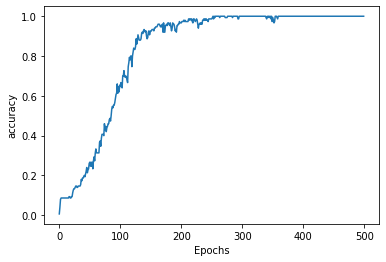

In [15]:
plot_metric(history, 'accuracy')

In [26]:
seed_text = "It was a cold night."

##add number of words you want to predict
next_words = 100
  
##run the loop to predict and concatenate the word
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
  ##predict the class using the trained model
  #predicted = model.(token_list, verbose=0)
  predicted = np.argmax(model.predict(token_list), axis=-1)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    ##reference the predicted class with the vocabulary
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

It was a cold night. bullets thundered on the castle windows for days on end the lake rose the lake rose the flower beds turned into and hagrid's pumpkins pumpkins swelled to the size of garden sheds sheds sheds sheds sheds sheds and splattered with mud mud mud mud mud before halloween to gryffindor tower drenched to the skin and splattered with mud mud mud mud mud mud bullied by percy percy percy percy percy percy percy percy percy pouring from under her vivid her gave her whole head was fire fire fire fire the castle days castle days castle days before lake tower tower
